# IMPORTING THE NECESSARY MODULES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# import the dataset

In [2]:
df = pd.read_csv('C:/Users/Hemant/jupyter_codes/ML Project 1/house price prediction/boston_house_dataset.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#shape of the dataframe
df.shape

(506, 14)

In [5]:
#checking for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
#statistical measure of data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df['PRICE'] = df['MEDV']

In [9]:
df = df.drop('MEDV', axis = 1)

In [10]:
#understanding the correlation between various features in the dataset
correlation = df.corr()

<AxesSubplot:>

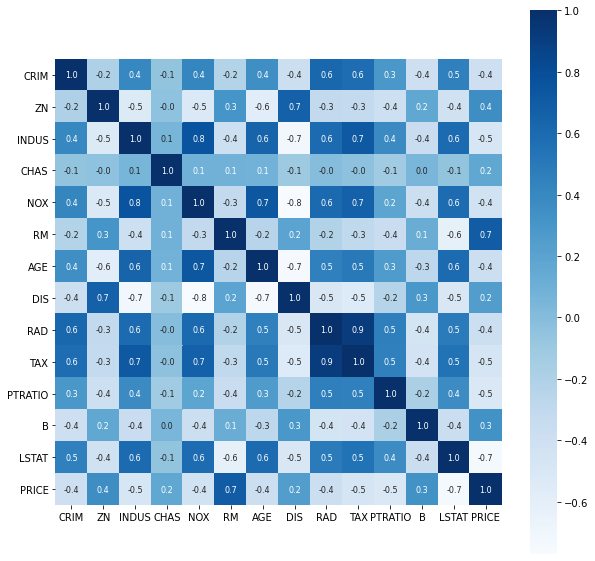

In [11]:
#constructing a heatmap to understand the correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, fmt = '.1f', square = True, annot = True, annot_kws = {'size' : 8}, cmap = 'Blues')

In [14]:
#splitting the data and target
X = df.drop('PRICE', axis = 1)
Y = df['PRICE']

In [15]:
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


# splitting the data into train and test data and model training


In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [17]:
#model training
model = XGBRegressor()

In [18]:
#training the model on training data
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# prediction on training data

In [19]:
#accuracy of prediction on training data
predict_values = model.predict(x_train)

In [20]:
print(predict_values)

[23.129652  21.009012  20.099192  34.67368   13.904932  13.502851
 22.00094   15.192153  10.890555  22.705019  13.8000345  5.599227
 29.801107  49.996742  34.89675   20.628222  23.382809  19.215553
 32.699738  19.602438  26.98426    8.388609  45.99946   21.684483
 27.082136  19.370832  19.300947  24.799126  22.605488  31.706104
 18.549387   8.692701  17.408169  23.70425   13.30351   10.519207
 12.678757  24.993195  19.693144  14.910025  24.219734  24.999817
 14.912334  16.998755  15.604408  12.704556  24.500704  15.003316
 50.00008   17.519024  21.19879   31.996252  15.595924  22.890852
 19.294544  18.705317  23.295357  37.21913   30.09247   33.101555
 21.000753  49.994682  13.401703   5.0040035 16.499456   8.39881
 28.675535  19.498577  20.601292  45.389637  39.80673   33.4038
 19.81726   33.404335  25.28952   50.00839   12.539593  17.421322
 18.60467   22.613768  50.002087  23.781918  23.308231  23.0998
 41.69784   16.104687  31.600492  36.081688   6.9966974 20.403484
 19.996716  11.

In [21]:
#R squared error
score1 = metrics.r2_score(y_train, predict_values)

#mean absolute error
score2 = metrics.mean_absolute_error(y_train, predict_values)

In [22]:
print('R square error :', score1)
print('mean square error :', score2)

R square error : 0.9999971520572263
mean square error : 0.010669947850822202


Text(0.5, 1.0, 'ACTUAL PRICE VS. PREDICTED PRICE')

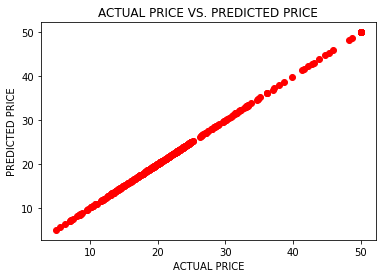

In [30]:
#visualize the actual price and the predicted price
plt.scatter(y_train, predict_values, color = 'red')
plt.xlabel('ACTUAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.title('ACTUAL PRICE VS. PREDICTED PRICE')

# predicting the values on test data

In [23]:
#accuracy of prediction on testing data
test_predict_values = model.predict(x_test)

In [24]:
#R squared error
score1 = metrics.r2_score(y_test, test_predict_values)

#mean absolute error
score2 = metrics.mean_absolute_error(y_test, test_predict_values)

In [25]:
print('R square error :', score1)
print('mean square error :', score2)

R square error : 0.8696329405266244
mean square error : 2.286214482550527


Text(0.5, 1.0, 'ACTUAL PRICE VS. PREDICTED PRICE')

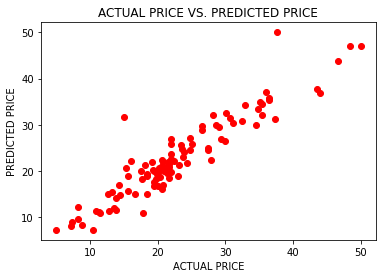

In [31]:
#visualize the actual price and the predicted price
plt.scatter(y_test, test_predict_values, color = 'red')
plt.xlabel('ACTUAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.title('ACTUAL PRICE VS. PREDICTED PRICE')

# model testing

In [36]:
input_value = input()
input_array = [float(i) for i in input_value.split(',')]

input_array = np.asarray(input_array)
reshaped_array = input_array.reshape(1, -1)
#print(reshaped_array)
predict = model.predict(reshaped_array)
print('THE PREDICTED PRICE IS :', predict)

0.63796,0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21,380.02,10.26
[[  0.63796   0.        8.14      0.        0.538     6.096    84.5
    4.4619    4.      307.       21.      380.02     10.26   ]]
THE PREDICTED PRICE IS : [21.199455]
